In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
merged_df = pd.read_csv("Merged.csv")

# Data Description

In [3]:
df = merged_df.copy()

In [4]:
df.head(2)

,Unnamed: 0,DocumentId,DateAndTime,PartName,DocumentConfirmation,MeasurementPlan,Order,DrawingNo,DimId,DimInfo,RowId,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,0,e49ccee3-dc5b-4374-a333-fa819bc44cb7,2021-12-01 17:44:34+03,B 5001,2,911 906 017 5 TP CAP59 --X ---,C 133 T21-49-1-19,911 9060 175,55d91a3d-f663-4a8a-8a2f-90cc327f25aa,17-Q 90 SALGI PROB GRI,2d27557f-ded9-4933-8282-e7b4c62d000f,0.015115,0.0,0.015,0.0,0.015115,0.000115,1
1,1,e49ccee3-dc5b-4374-a333-fa819bc44cb7,2021-12-01 17:44:34+03,B 5001,2,911 906 017 5 TP CAP59 --X ---,C 133 T21-49-1-19,911 9060 175,5e75e754-a29d-49a2-841c-3eb8aa0493a9,22 ic duzlem SALGI GRI PROB,efc81067-e39c-4376-b1c3-acc02cc6bedb,0.059604,0.0,0.050,0.0,0.059604,0.009604,1


In [5]:
df.shape

(7259, 18)

In [6]:
#std değerleri çok yüksek ya da düşük. Bu durum değerler arasında sapmaların fazla olduğunu gösteriyor.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7259 non-null   int64  
 1   DocumentId            7259 non-null   object 
 2   DateAndTime           7259 non-null   object 
 3   PartName              7259 non-null   object 
 4   DocumentConfirmation  7259 non-null   int64  
 5   MeasurementPlan       7259 non-null   object 
 6   Order                 7259 non-null   object 
 7   DrawingNo             7259 non-null   object 
 8   DimId                 7259 non-null   object 
 9   DimInfo               7259 non-null   object 
 10  RowId                 7259 non-null   object 
 11  Measurement           7259 non-null   float64
 12  Nominal               7259 non-null   float64
 13  PositiveTolerance     7259 non-null   float64
 14  NegativeTolerance     7259 non-null   float64
 15  Deviation            

In [9]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [10]:
df.loc[:, df.dtypes == 'object'] =\
    df.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DocumentId            7259 non-null   category
 1   DateAndTime           7259 non-null   category
 2   PartName              7259 non-null   category
 3   DocumentConfirmation  7259 non-null   int64   
 4   MeasurementPlan       7259 non-null   category
 5   Order                 7259 non-null   category
 6   DrawingNo             7259 non-null   category
 7   DimId                 7259 non-null   category
 8   DimInfo               7259 non-null   category
 9   RowId                 7259 non-null   category
 10  Measurement           7259 non-null   float64 
 11  Nominal               7259 non-null   float64 
 12  PositiveTolerance     7259 non-null   float64 
 13  NegativeTolerance     7259 non-null   float64 
 14  Deviation             7259 non-null   float64 
 15  OutT

In [11]:
tdf=df.copy()

### Categorical Data

In [12]:
cat_df = tdf.select_dtypes(include=["category"])

In [13]:
cat_df.head(2)

,DocumentId,DateAndTime,PartName,MeasurementPlan,Order,DrawingNo,DimId,DimInfo,RowId
0,e49ccee3-dc5b-4374-a333-fa819bc44cb7,2021-12-01 17:44:34+03,B 5001,911 906 017 5 TP CAP59 --X ---,C 133 T21-49-1-19,911 9060 175,55d91a3d-f663-4a8a-8a2f-90cc327f25aa,17-Q 90 SALGI PROB GRI,2d27557f-ded9-4933-8282-e7b4c62d000f
1,e49ccee3-dc5b-4374-a333-fa819bc44cb7,2021-12-01 17:44:34+03,B 5001,911 906 017 5 TP CAP59 --X ---,C 133 T21-49-1-19,911 9060 175,5e75e754-a29d-49a2-841c-3eb8aa0493a9,22 ic duzlem SALGI GRI PROB,efc81067-e39c-4376-b1c3-acc02cc6bedb


In [14]:
##'DocumentId','DateAndTime','DocumentConfirmation','DimId','RowId' ---> unnecessary columns

In [15]:
cat_df.isnull().any()

DocumentId         False
DateAndTime        False
PartName           False
MeasurementPlan    False
Order              False
DrawingNo          False
DimId              False
DimInfo            False
RowId              False
dtype: bool

In [16]:
cat_df.PartName.value_counts()
## Bu sütun ikiye bölünerek vardiya ve ekip adında iki sütuna dönüştürülecektir.

C 6001      467
B 5004      450
B 5001      402
B 5005      335
B 5002      311
           ... 
B  5003       1
B - 5005      1
A 1008        1
A 1005        1
B - 5007      1
Name: PartName, Length: 96, dtype: int64

In [17]:
cat_df.MeasurementPlan.value_counts()
## Bu sütunun isimleri gizlenecek
## Son 7 değer OTHER başlığı altında birleştirilecek
## Toplam 4 farklı kategoride değerlendirilecektir

911 906 017 5 TP CAP59 --X ---        5891
UZUN KISITLANMIS 4123520165---2        979
912 518 014 5 KAFA - X TE1-            246
411 154 011 5  tp--                     36
4123520165                              36
911 906 017 5 TP CAP59 -X---            29
4111540115 85.8 DIK es merkezlilik      24
K3659390 FINAL REV1                      9
912 510 010 5                            7
001-0521-00 DUZLEMSELLIK                 2
Name: MeasurementPlan, dtype: int64

In [18]:
cat_df.Order.value_counts()
## BenchNo ve Order olarak ikiye bölünecek
## Order bölümünde önemli olan makinenin hangi kolu olduğu
## Bu sebeple sadece o tutulabilir.(Eğer çekilebilirse)

C 133 T21-46-1-9 TKR        57
C 133 T21-46-1-9            56
C 133 T21-46-1-29           55
C 112 T22-4-3-117 ONAY 1    46
C 112 T22-4-4-117 ONAY 1    44
                            ..
C 76 T21-42-2-1              1
C 76 T21-42-1-62             1
C 57 T22-7-2-116             1
C 76 T21-42-1-29             1
C 76 T21-42-1-72             1
Name: Order, Length: 1785, dtype: int64

In [19]:
cat_df.DrawingNo.value_counts()
## Son 4 değer OTHER olarak birleştirilmeli

911 9060 175         5920
412 3520 165         1015
912 5180 145          246
411 1540 115           60
K3659390 OPR REV1       9
912 5100 105            7
001 0521 00             2
Name: DrawingNo, dtype: int64

In [20]:
cat_df.DimInfo.value_counts()
## Sayılarına göre burada da OTHER kategorisi oluşturulabilir

34 G M10 ILE KARSILASTIRMA        537
15 Q59 SALGI 2 PROB GRI           397
17-Q 90 SALGI PROB GRI            191
17 Q90 SALGI                      191
24 A2                             170
                                 ... 
Bilgi Q 52H7 nin Q 34 e gore Y      1
DOKUM POZISYON 2                    1
DOKUM POZISYON 2.X                  1
Diameter_Circle5 B REF DIP          1
-18                                 1
Name: DimInfo, Length: 266, dtype: int64

In [21]:
### hedef sütun için oversampling işlemi uygulanmalıdır.

### Numerical Data

In [22]:
num_df = tdf.select_dtypes(include=["float64", "int64"])

In [23]:
num_df.head(2)

,DocumentConfirmation,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,2,0.015115,0.0,0.015,0.0,0.015115,0.000115,1
1,2,0.059604,0.0,0.050,0.0,0.059604,0.009604,1


In [24]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DocumentConfirmation,7259.0,1.944896e+00,2.281989e-01,1.000000e+00,2.000000,2.000000,2.000000,2.000000e+00
Measurement,7259.0,8.118432e+03,3.764781e+05,-1.575447e+06,0.015527,0.094012,10322.539000,4.342325e+06
Nominal,7259.0,8.804946e-01,3.998015e+01,-1.574000e+02,0.000000,0.000000,0.000000,4.350000e+02
PositiveTolerance,7259.0,1.401914e-01,1.623393e-01,5.000000e-03,0.018000,0.060000,0.250000,2.000000e+00
NegativeTolerance,7259.0,-6.629957e-02,1.442132e-01,-1.000000e+00,-0.075000,0.000000,0.000000,0.000000e+00
Deviation,7259.0,-5.521102e+00,1.819369e+03,-2.887719e+04,-0.018209,0.039901,0.271569,3.366888e+04
OutTolerance,7259.0,2.932739e+10,7.720649e+11,1.023000e-04,0.003402,0.014115,0.052612,3.066888e+13
RowConfirmation,7259.0,1.719245e+00,4.493990e-01,1.000000e+00,1.000000,2.000000,2.000000,2.000000e+00


In [25]:
## Mean ve std değerleri çok yüksek
## Min max değerleri arasındaki farklar çok büyük
## DocumentConfirmation sütunu kaldırılmalıdır

# Visualization

# Preprocessing

### DIMENTIONALITY REDUCTION

In [26]:
#drop unnecesarry columns
tdf= tdf.drop(columns=['DocumentId','DateAndTime','DocumentConfirmation','DimId','RowId' ])

In [27]:
tdf.head(2)

,PartName,MeasurementPlan,Order,DrawingNo,DimInfo,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B 5001,911 906 017 5 TP CAP59 --X ---,C 133 T21-49-1-19,911 9060 175,17-Q 90 SALGI PROB GRI,0.015115,0.0,0.015,0.0,0.015115,0.000115,1
1,B 5001,911 906 017 5 TP CAP59 --X ---,C 133 T21-49-1-19,911 9060 175,22 ic duzlem SALGI GRI PROB,0.059604,0.0,0.050,0.0,0.059604,0.009604,1


In [28]:
tdf.RowConfirmation = tdf.RowConfirmation.astype('category')

In [29]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PartName           7259 non-null   category
 1   MeasurementPlan    7259 non-null   category
 2   Order              7259 non-null   category
 3   DrawingNo          7259 non-null   category
 4   DimInfo            7259 non-null   category
 5   Measurement        7259 non-null   float64 
 6   Nominal            7259 non-null   float64 
 7   PositiveTolerance  7259 non-null   float64 
 8   NegativeTolerance  7259 non-null   float64 
 9   Deviation          7259 non-null   float64 
 10  OutTolerance       7259 non-null   float64 
 11  RowConfirmation    7259 non-null   category
dtypes: category(6), float64(6)
memory usage: 489.4 KB


### NEW FEATURES

In [30]:
#PartName->Shift+Team
#Order-> Bench+OrderPlan

In [31]:
cat_df =tdf.select_dtypes(include=["category"])
cat_df.head(2)

,PartName,MeasurementPlan,Order,DrawingNo,DimInfo,RowConfirmation
0,B 5001,911 906 017 5 TP CAP59 --X ---,C 133 T21-49-1-19,911 9060 175,17-Q 90 SALGI PROB GRI,1
1,B 5001,911 906 017 5 TP CAP59 --X ---,C 133 T21-49-1-19,911 9060 175,22 ic duzlem SALGI GRI PROB,1


In [32]:

shift = []
teamNo = []
bench = []
order=[]
cntr=0

cat_df["PartName"]=cat_df["PartName"].str.replace(' ','') 
cat_df["PartName"]=cat_df["PartName"].str.replace('-','') 

for i in range(0,cat_df.index.size):
    ## PartName, Shift ve TeamNo olarak ikiye bölünecektir
    ## if-else kontrolü Shiftin eksik olma durumunu kontrol içindir
    if(cat_df.iloc[i][0][0].isalpha()==True):
        shift.insert(i,cat_df.iloc[i][0][0])
        teamNo.insert(i,cat_df.iloc[i][0][1:])
    else:
        shift.insert(i,np.NaN)
        teamNo.insert(i,cat_df.iloc[i][0])
    
    
    ## Order sütunu bench ve order olarak ikiye bölünecektir
    split_arr = cat_df.iloc[i][2].strip().split(" ")
    count1=0
    count2=0
    str=''
    order_val=False
    bench_val=False
    
    for k in range(0,len(split_arr)):
        if(split_arr[k].startswith("T2")):
            order.insert(i,split_arr[k])
            order_val=True
            
        elif(split_arr[k].startswith("C") and count2==0 and count1==0):
            count1=1
            bench_val=True
            if(len(split_arr[k])>1):
                bench.insert(i,split_arr[k])
            else:
                bench.insert(i,split_arr[k]+split_arr[k+1])
                
        elif(count1==0):
            if(split_arr[k].startswith("C")):
                break
            count2=1
            str+=split_arr[k]+' '
    
    str=str.strip()
    
    if(str!=''):
        bench_val=True
        bench.insert(i,str)
    if(bench_val==False):
        bench.insert(i,'TANIMSIZ')
    
    if(order_val==False):
        order.insert(i,'TANIMSIZ')
   

In [33]:
## Bazı benchler C133 bazıları C-133 şeklindedir
## Ortak forma dönüştürmek için -'ler kaldırıldı
for i in range(0,len(bench)):
    bench[i]= bench[i].replace('-','')

In [34]:
## yeni listelerin size kontrolü
print("tdf size: ",tdf.index.size)
print("bench list length: ",len(bench))
print("order list length: ",len(order))

tdf size:  7259
bench list length:  7259
order list length:  7259


In [35]:
## Kullanılmayacak sütunlar kaldırıldı
tdf=tdf.drop('Order',axis=1)
tdf=tdf.drop('PartName',axis=1)

In [36]:
## yeni listelerin tabloya eklenmesi
tdf.insert(0,'Shift',shift)
tdf.insert(1,'TeamNo',teamNo)
tdf.insert(2,'BenchNo',bench)
tdf.insert(3,'Order',order)

In [37]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Shift              7259 non-null   object  
 1   TeamNo             7259 non-null   object  
 2   BenchNo            7259 non-null   object  
 3   Order              7259 non-null   object  
 4   MeasurementPlan    7259 non-null   category
 5   DrawingNo          7259 non-null   category
 6   DimInfo            7259 non-null   category
 7   Measurement        7259 non-null   float64 
 8   Nominal            7259 non-null   float64 
 9   PositiveTolerance  7259 non-null   float64 
 10  NegativeTolerance  7259 non-null   float64 
 11  Deviation          7259 non-null   float64 
 12  OutTolerance       7259 non-null   float64 
 13  RowConfirmation    7259 non-null   category
dtypes: category(4), float64(6), object(4)
memory usage: 613.7+ KB


In [38]:
## Yeni eklenen sütunlarn doğru forma dönüştürülmesi
tdf.loc[:, tdf.dtypes == 'object'] =\
    tdf.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

In [39]:
tdf.head(2)

,Shift,TeamNo,BenchNo,Order,MeasurementPlan,DrawingNo,DimInfo,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,T21-49-1-19,911 906 017 5 TP CAP59 --X ---,911 9060 175,17-Q 90 SALGI PROB GRI,0.015115,0.0,0.015,0.0,0.015115,0.000115,1
1,B,5001,C133,T21-49-1-19,911 906 017 5 TP CAP59 --X ---,911 9060 175,22 ic duzlem SALGI GRI PROB,0.059604,0.0,0.050,0.0,0.059604,0.009604,1


In [40]:
## Order sütunundan makine kolunun numarası çekilecek
list=tdf.Order

In [41]:
part_of_machine = []
counter=0
for i in range(0,len(list)):
    list[i] = list[i].replace(" ","")
    arr= list[i].split('-')
    if(len(arr)!=4):
        part_of_machine.insert(i,'TANIMSIZ')
        counter=counter+1
    else:
        part_of_machine.insert(i,arr[2])


In [42]:
counter

96

In [43]:
## 'TANIMSIZ' değerleri kaybetmemek için diğer 4 değere eşit olarak dağıtılacaktır
count=1
j=0
value=['1','2','3','4']
for i in range(0,len(part_of_machine)): 
    if(part_of_machine[i]=='TANIMSIZ'):         
        part_of_machine[i] = value[j]
        if(count%24==0):
            j=j+1
        count=count+1

In [44]:
tdf.insert(3,'PartofMachine',part_of_machine)

In [45]:
tdf.PartofMachine.value_counts()

2    2124
1    2039
3    1600
4    1496
Name: PartofMachine, dtype: int64

### DATA HIDING

In [46]:
tdf.head(1)

,Shift,TeamNo,BenchNo,PartofMachine,Order,MeasurementPlan,DrawingNo,DimInfo,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,T21-49-1-19,911 906 017 5 TP CAP59 --X ---,911 9060 175,17-Q 90 SALGI PROB GRI,0.015115,0.0,0.015,0.0,0.015115,0.000115,1


###### MEASAUREMENT PLAN

In [47]:
tdf.MeasurementPlan.value_counts()

911 906 017 5 TP CAP59 --X ---        5891
UZUN KISITLANMIS 4123520165---2        979
912 518 014 5 KAFA - X TE1-            246
411 154 011 5  tp--                     36
4123520165                              36
911 906 017 5 TP CAP59 -X---            29
4111540115 85.8 DIK es merkezlilik      24
K3659390 FINAL REV1                      9
912 510 010 5                            7
001-0521-00 DUZLEMSELLIK                 2
Name: MeasurementPlan, dtype: int64

In [48]:
temp=pd.DataFrame(tdf['MeasurementPlan'].value_counts())
temp['MeasurementPlanName']=temp.index

In [49]:
import string
string='XYZT'
for i in range(0,temp.index.size):
    if(temp.iloc[i]['MeasurementPlan']<200):
        tdf.MeasurementPlan = tdf.MeasurementPlan.replace(temp.iloc[i]['MeasurementPlanName'],"OTHERS")
    else:
        rnd=random.choice(string)
        new_val='Measurement Plan '+ rnd
        string = string.replace(rnd,'')
        tdf.MeasurementPlan = tdf.MeasurementPlan.replace(temp.iloc[i]['MeasurementPlanName'],new_val)
        

In [50]:
tdf.MeasurementPlan.value_counts()

Measurement Plan X    5891
Measurement Plan T     979
Measurement Plan Y     246
OTHERS                 143
Name: MeasurementPlan, dtype: int64

###### DRAWING NO

In [51]:
tdf.DrawingNo.value_counts()

911 9060 175         5920
412 3520 165         1015
912 5180 145          246
411 1540 115           60
K3659390 OPR REV1       9
912 5100 105            7
001 0521 00             2
Name: DrawingNo, dtype: int64

In [52]:
temp=pd.DataFrame(tdf['DrawingNo'].value_counts())
temp.rename(columns={'DrawingNo':'Count'},inplace = True)
temp['DrawingNo']=temp.index
temp.reset_index(inplace=True)
temp.drop('index',axis=1,inplace=True)

In [53]:
for i in range(0,temp.index.size):
    if(temp.iloc[i]['Count']<200):
        tdf.DrawingNo = tdf.DrawingNo.replace(temp.iloc[i]['DrawingNo'],"OTHERS")
        

In [54]:
tdf.DrawingNo.value_counts()

911 9060 175    5920
412 3520 165    1015
912 5180 145     246
OTHERS            78
Name: DrawingNo, dtype: int64

###### DIM INFO

In [55]:
pd.set_option("display.max_rows", None)
tdf.DimInfo.value_counts()

34 G M10 ILE KARSILASTIRMA                      537
15 Q59 SALGI 2 PROB GRI                         397
17-Q 90 SALGI PROB GRI                          191
17 Q90 SALGI                                    191
24 A2                                           170
34 G M10                                        160
24 A3                                           142
34 G M10.Y                                      141
Q114 Y EKSENI                                   138
25 A3                                           130
24 A1                                           127
34 G M10 ILE KARSILASTIRMA.Y                    120
40 M12X1.75                                     119
25 A1                                           110
25 A4                                           107
25 A2                                           103
24 A4                                            98
Q 90 PROB A1                                     98
2 duzlem-silindir diklik                         95
19 -x teki d

In [56]:
temp=pd.DataFrame(tdf['DimInfo'].value_counts())
temp.rename(columns={'DimInfo':'Count'},inplace = True)
temp['DimInfo']=temp.index
temp.reset_index(inplace=True)
temp.drop('index',axis=1,inplace=True)

In [57]:
temp.head(2)

,Count,DimInfo
0,537,34 G M10 ILE KARSILASTIRMA
1,397,15 Q59 SALGI 2 PROB GRI


###### TEAM NO

In [59]:
pd.set_option("display.max_rows", None)

In [60]:
tdf.TeamNo.value_counts()

6001    471
5004    461
5001    404
5005    355
5002    318
4006    288
5003    287
5006    267
4003    259
4004    258
5009    240
6003    240
6005    220
4002    218
4005    208
5010    208
6004    206
5008    192
6002    191
4007    186
5007    152
4001    152
6007    140
6006    139
4008    124
6009     91
5012     88
4009     84
6008     80
5011     73
6012     66
6011     59
4010     54
6010     52
5014     49
5013     48
4011     38
4013     38
4012     33
4014     31
6013     25
1002     18
1003     16
6014     13
1006     12
5016     11
5017     11
8003     10
5015      9
5020      7
4015      6
4025      6
1007      6
6016      5
6015      5
4017      5
6017      4
1001      4
4024      4
1004      3
5021      3
4016      2
5018      2
5019      2
1008      1
1005      1
Name: TeamNo, dtype: int64

In [61]:
temp=pd.DataFrame(tdf['TeamNo'].value_counts())
temp.rename(columns={'TeamNo':'Count'},inplace = True)
temp['TeamNo']=temp.index
temp.reset_index(inplace=True)
temp.drop('index',axis=1,inplace=True)

### MISSING VALUES

In [63]:
## Boş değer görünmese de tanımsız değer olabilir
tdf.isnull().values.any()

False

In [64]:
tdf.Shift.value_counts()

B    3194
A    2055
C    1950
c      57
a       3
Name: Shift, dtype: int64

In [65]:
tdf.Shift = tdf.Shift.replace(['c','a','b'],['C','A','B'])

In [66]:
tdf.Shift.value_counts()

B    3194
A    2058
C    2007
Name: Shift, dtype: int64

In [67]:
tdf.Shift=tdf.Shift.astype('category')

In [68]:
tdf.Shift.dtype

CategoricalDtype(categories=['A', 'B', 'C'], ordered=False)

In [69]:
## Diğer Sütunlar da kontrol edildi. Boş ya da tanımsız değerler yok

In [70]:
tdf.index.size

7259

In [71]:
tdf.head()

,Shift,TeamNo,BenchNo,PartofMachine,Order,MeasurementPlan,DrawingNo,DimInfo,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17-Q 90 SALGI PROB GRI,0.015115,0.0,0.015,0.0,0.015115,0.000115,1
1,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.059604,0.0,0.050,0.0,0.059604,0.009604,1
2,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17 Q90 SALGI,0.015641,0.0,0.015,0.0,0.015641,0.000641,1
3,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI,0.060900,0.0,0.050,0.0,0.060900,0.010900,2
4,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.059604,0.0,0.050,0.0,0.059604,0.009604,1


#### SOME GRAPHICS

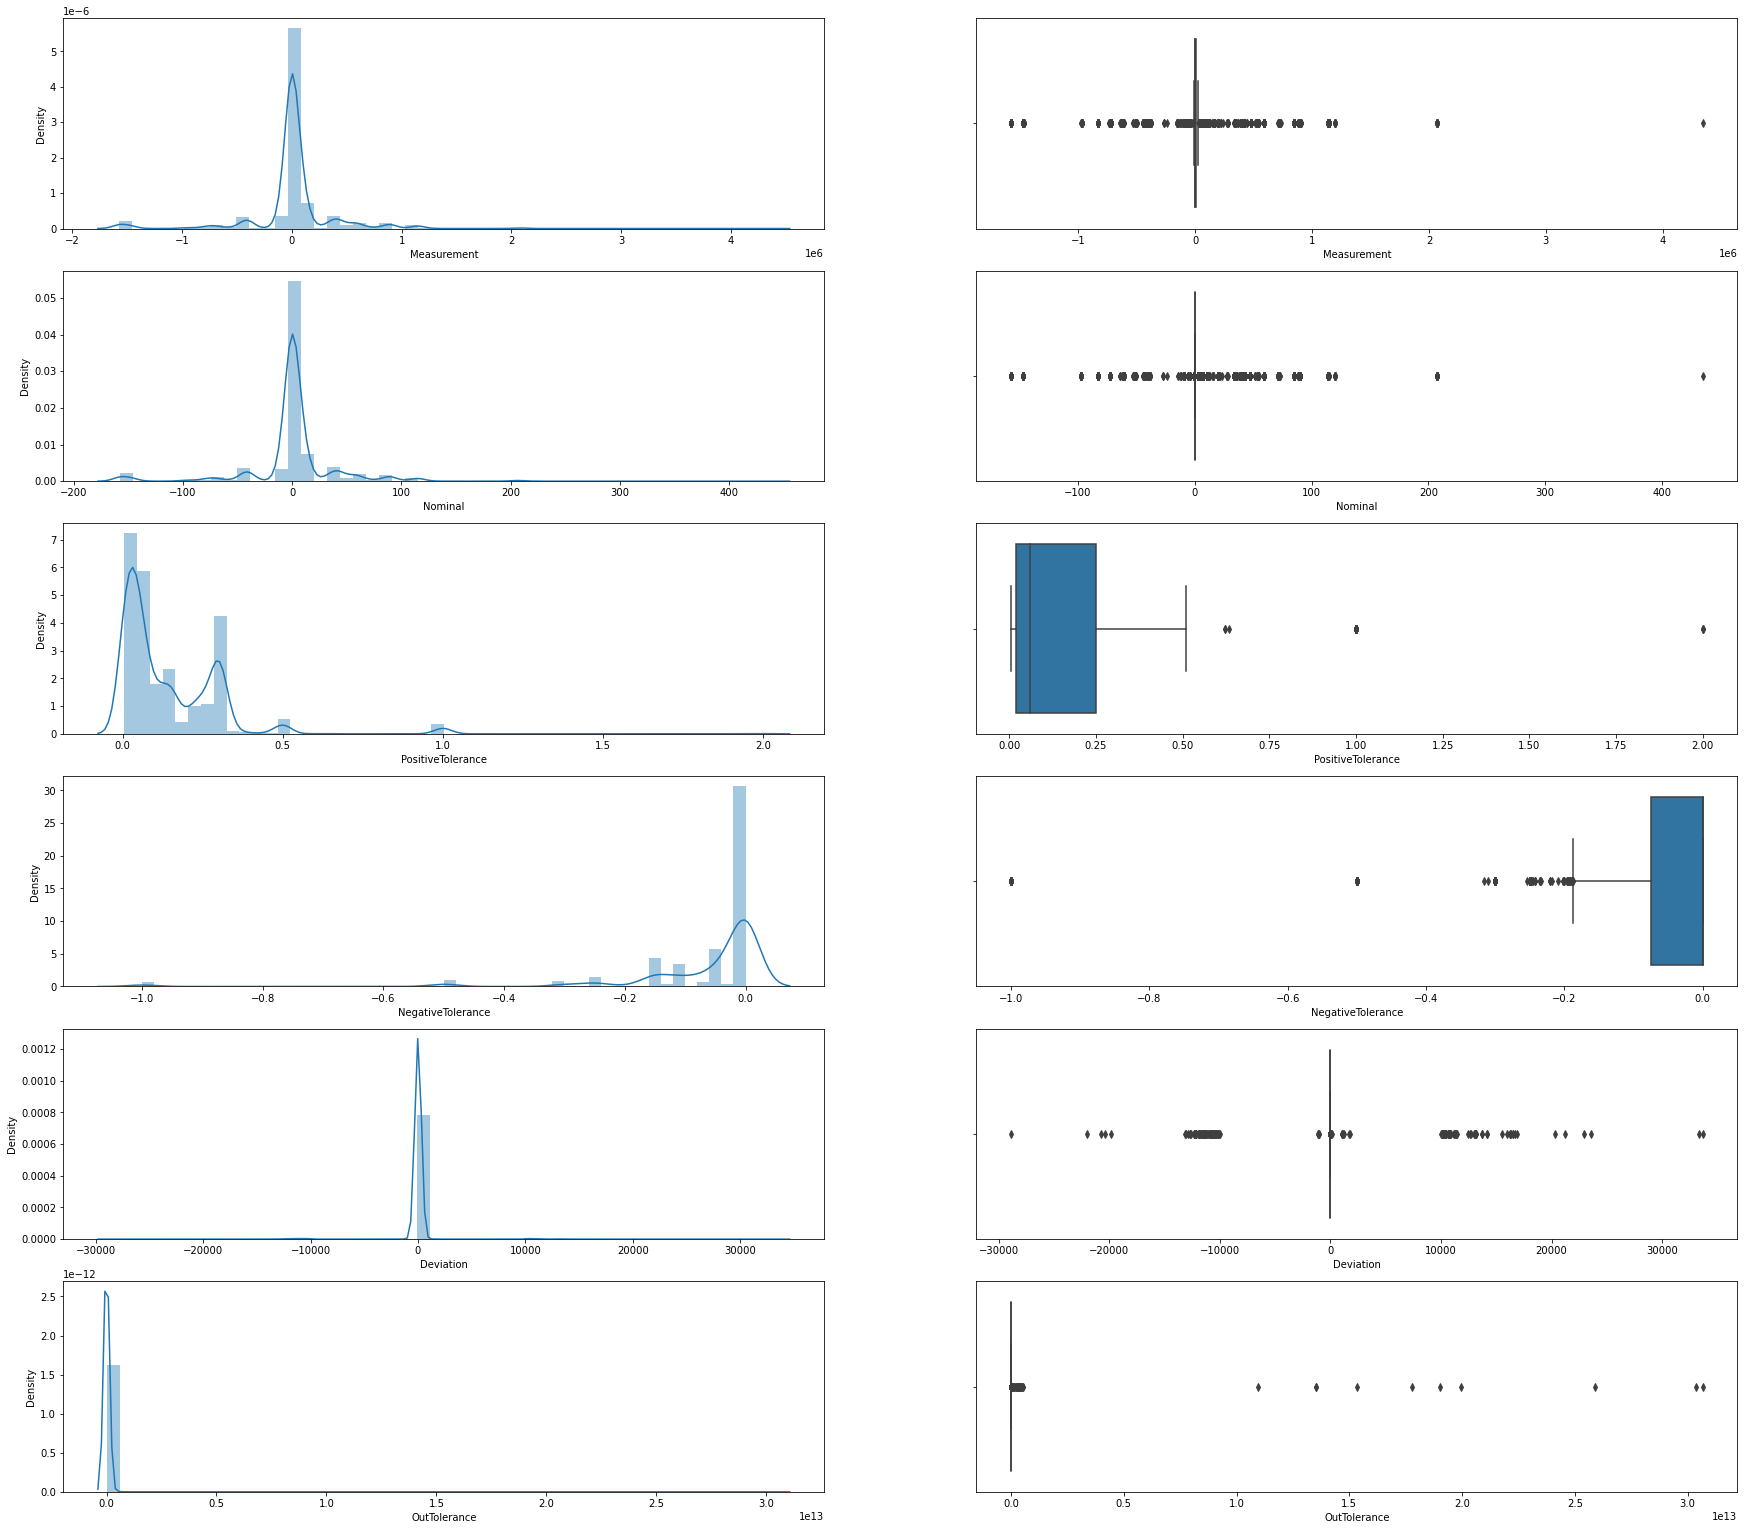

In [72]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(30,55))
plt.subplot(12,2,1)
sns.distplot(tdf['Measurement'])
plt.subplot(12,2,2)
sns.boxplot(tdf['Measurement'])
plt.subplot(12,2,3)
sns.distplot(tdf['Nominal'])
plt.subplot(12,2,4)
sns.boxplot(tdf['Nominal'])
plt.subplot(12,2,5)
sns.distplot(tdf['PositiveTolerance'])
plt.subplot(12,2,6)
sns.boxplot(tdf['PositiveTolerance'])
plt.subplot(12,2,7)
sns.distplot(tdf['NegativeTolerance'])
plt.subplot(12,2,8)
sns.boxplot(tdf['NegativeTolerance'])
plt.subplot(12,2,9)
sns.distplot(tdf['Deviation'])
plt.subplot(12,2,10)
sns.boxplot(tdf['Deviation'])
plt.subplot(12,2,11)
sns.distplot(tdf['OutTolerance'])
plt.subplot(12,2,12)
sns.boxplot(tdf['OutTolerance'])
plt.show()

### OUTLIER DETECTION

In [73]:
temp_df=tdf.copy()

In [74]:
tdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Measurement,7259.0,8.118432e+03,3.764781e+05,-1.575447e+06,0.015527,0.094012,10322.539000,4.342325e+06
Nominal,7259.0,8.804946e-01,3.998015e+01,-1.574000e+02,0.000000,0.000000,0.000000,4.350000e+02
PositiveTolerance,7259.0,1.401914e-01,1.623393e-01,5.000000e-03,0.018000,0.060000,0.250000,2.000000e+00
NegativeTolerance,7259.0,-6.629957e-02,1.442132e-01,-1.000000e+00,-0.075000,0.000000,0.000000,0.000000e+00
Deviation,7259.0,-5.521102e+00,1.819369e+03,-2.887719e+04,-0.018209,0.039901,0.271569,3.366888e+04
OutTolerance,7259.0,2.932739e+10,7.720649e+11,1.023000e-04,0.003402,0.014115,0.052612,3.066888e+13


#### Find upper-lower limit with IQR and fill these values np.nan(for KNN imputer)

In [75]:
lower_df=pd.DataFrame()
upper_df=pd.DataFrame()
for column in tdf:
    if(tdf[column].dtype == np.int64 or tdf[column].dtype == np.float64):
        Q1 = tdf[column].quantile(0.25)
        Q3 = tdf[column].quantile(0.75)
        IQR = Q3-Q1
        
        lower_limit = Q1 - (1.5 * IQR)
        upper_limit = Q3 + (1.5 * IQR)
        
        lower_outliers=(tdf[column] < lower_limit)
        upper_outliers=(tdf[column] > upper_limit)
   
        tdf.loc[lower_outliers,column]=np.NaN
        tdf.loc[upper_outliers,column]=np.NaN


#### Filling the nan values with KNN Algorithm

In [76]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
X= tdf.select_dtypes("float64","int64")
imputer.fit(X)
Xtrans = imputer.transform(X)

In [77]:
print(sum(np.isnan(Xtrans).flatten()))

0


In [78]:
lof_df= pd.DataFrame(Xtrans)
lof_df = lof_df.rename(columns={0: 'Measurement', 1: 'Nominal',2:'PositiveTolerance',3:'NegativeTolerance',4:'Deviation',5:'OutTolerance'})

In [79]:
lof_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Measurement,7259.0,290.503128,4503.664206,-14110.008000,0.013261,0.060001,0.416924,25382.745000
Nominal,7259.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PositiveTolerance,7259.0,0.127873,0.121517,0.005000,0.018000,0.060000,0.236577,0.508794
NegativeTolerance,7259.0,-0.032456,0.049875,-0.187074,-0.050000,0.000000,0.000000,0.000000
Deviation,7259.0,0.103480,0.202893,-0.440533,0.010718,0.050848,0.266998,0.706065
OutTolerance,7259.0,0.029419,0.036503,0.000102,0.003181,0.012831,0.043166,0.126254


In [80]:
for column in lof_df:
    tdf[column] = lof_df[column]

In [81]:
tdf.isnull().any()

Shift                False
TeamNo               False
BenchNo              False
PartofMachine        False
Order                False
MeasurementPlan      False
DrawingNo            False
DimInfo              False
Measurement          False
Nominal              False
PositiveTolerance    False
NegativeTolerance    False
Deviation            False
OutTolerance         False
RowConfirmation      False
dtype: bool

In [82]:
### min-max normalization --> [0-1]
# tdf.drop('index',axis=1,inplace=True)

### NORMALIZATION

In [83]:
tdf.head()

,Shift,TeamNo,BenchNo,PartofMachine,Order,MeasurementPlan,DrawingNo,DimInfo,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17-Q 90 SALGI PROB GRI,0.015115,0.0,0.015,0.0,0.015115,0.000115,1
1,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.059604,0.0,0.050,0.0,0.059604,0.009604,1
2,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17 Q90 SALGI,0.015641,0.0,0.015,0.0,0.015641,0.000641,1
3,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI,0.060900,0.0,0.050,0.0,0.060900,0.010900,2
4,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.059604,0.0,0.050,0.0,0.059604,0.009604,1


In [84]:
normalized_df = tdf.reset_index()
normalized_df.drop('index',axis=1,inplace=True)

In [85]:
normalized_df.head()

,Shift,TeamNo,BenchNo,PartofMachine,Order,MeasurementPlan,DrawingNo,DimInfo,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17-Q 90 SALGI PROB GRI,0.015115,0.0,0.015,0.0,0.015115,0.000115,1
1,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.059604,0.0,0.050,0.0,0.059604,0.009604,1
2,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17 Q90 SALGI,0.015641,0.0,0.015,0.0,0.015641,0.000641,1
3,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI,0.060900,0.0,0.050,0.0,0.060900,0.010900,2
4,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.059604,0.0,0.050,0.0,0.059604,0.009604,1


In [86]:
normalized_columns = tdf.select_dtypes([np.number]).columns

In [87]:
normalized_df[normalized_columns] = normalized_df[normalized_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [88]:
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Measurement,7259.0,0.364637,0.114038,0.0,0.357281,0.357282,0.357291,1.0
Nominal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PositiveTolerance,7259.0,0.243895,0.241203,0.0,0.025804,0.109172,0.459666,1.0
NegativeTolerance,7259.0,0.826507,0.266604,0.0,0.732726,1.000000,1.000000,1.0
Deviation,7259.0,0.474458,0.176952,0.0,0.393557,0.428555,0.617070,1.0
OutTolerance,7259.0,0.232391,0.289359,0.0,0.024405,0.100900,0.341366,1.0


In [89]:
normalized_df.head()

,Shift,TeamNo,BenchNo,PartofMachine,Order,MeasurementPlan,DrawingNo,DimInfo,Measurement,Nominal,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17-Q 90 SALGI PROB GRI,0.357281,NaN,0.019849,1.0,0.397391,0.000099,1
1,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,NaN,0.089322,1.0,0.436192,0.075320,1
2,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17 Q90 SALGI,0.357281,NaN,0.019849,1.0,0.397850,0.004268,1
3,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI,0.357282,NaN,0.089322,1.0,0.437322,0.085591,2
4,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,NaN,0.089322,1.0,0.436192,0.075320,1


In [90]:
## Nominal sütunu hiçbir işe yaramıyor. Kaldırılabilir.

In [91]:
normalized_df.drop('Nominal',axis=1,inplace=True)

In [92]:
normalized_df.head()

,Shift,TeamNo,BenchNo,PartofMachine,Order,MeasurementPlan,DrawingNo,DimInfo,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17-Q 90 SALGI PROB GRI,0.357281,0.019849,1.0,0.397391,0.000099,1
1,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,0.089322,1.0,0.436192,0.075320,1
2,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17 Q90 SALGI,0.357281,0.019849,1.0,0.397850,0.004268,1
3,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI,0.357282,0.089322,1.0,0.437322,0.085591,2
4,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,0.089322,1.0,0.436192,0.075320,1


In [93]:
tdf = normalized_df.copy();

### TRANSFORMATION

In [94]:
tdf.shape

(7259, 14)

In [95]:
tdf.head()

,Shift,TeamNo,BenchNo,PartofMachine,Order,MeasurementPlan,DrawingNo,DimInfo,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17-Q 90 SALGI PROB GRI,0.357281,0.019849,1.0,0.397391,0.000099,1
1,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,0.089322,1.0,0.436192,0.075320,1
2,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,17 Q90 SALGI,0.357281,0.019849,1.0,0.397850,0.004268,1
3,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI,0.357282,0.089322,1.0,0.437322,0.085591,2
4,B,5001,C133,1,T21-49-1-19,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,0.089322,1.0,0.436192,0.075320,1


In [96]:
tdf.RowConfirmation.value_counts()

2    5221
1    2038
Name: RowConfirmation, dtype: int64

In [97]:
tdf.DimInfo.cat.remove_unused_categories().value_counts().count()

266

In [98]:
tdf.DrawingNo.cat.remove_unused_categories().value_counts().count()

4

In [99]:
tdf.MeasurementPlan.cat.remove_unused_categories().value_counts().count()

4

In [100]:
tdf.Order.cat.remove_unused_categories().value_counts().count()

1699

In [101]:
tdf.BenchNo.cat.remove_unused_categories().value_counts().count()

29

In [102]:
tdf.TeamNo.cat.remove_unused_categories().value_counts().count()

66

In [103]:
tdf.Shift.dtype

CategoricalDtype(categories=['A', 'B', 'C'], ordered=False)

### REMOVE "ORDER" ATTRIBUTE

In [104]:
tdf= tdf.drop(columns=['Order'])

In [105]:
tdf.head()

,Shift,TeamNo,BenchNo,PartofMachine,MeasurementPlan,DrawingNo,DimInfo,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,Measurement Plan X,911 9060 175,17-Q 90 SALGI PROB GRI,0.357281,0.019849,1.0,0.397391,0.000099,1
1,B,5001,C133,1,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,0.089322,1.0,0.436192,0.075320,1
2,B,5001,C133,1,Measurement Plan X,911 9060 175,17 Q90 SALGI,0.357281,0.019849,1.0,0.397850,0.004268,1
3,B,5001,C133,1,Measurement Plan X,911 9060 175,22 ic duzlem SALGI,0.357282,0.089322,1.0,0.437322,0.085591,2
4,B,5001,C133,1,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,0.089322,1.0,0.436192,0.075320,1


### SPLIT DIMINFO

In [106]:
tdf['DimInfo'].value_counts()

34 G M10 ILE KARSILASTIRMA                      537
15 Q59 SALGI 2 PROB GRI                         397
17-Q 90 SALGI PROB GRI                          191
17 Q90 SALGI                                    191
24 A2                                           170
34 G M10                                        160
24 A3                                           142
34 G M10.Y                                      141
Q114 Y EKSENI                                   138
25 A3                                           130
24 A1                                           127
34 G M10 ILE KARSILASTIRMA.Y                    120
40 M12X1.75                                     119
25 A1                                           110
25 A4                                           107
25 A2                                           103
24 A4                                            98
Q 90 PROB A1                                     98
2 duzlem-silindir diklik                         95
19 -x teki d

In [107]:
temp=pd.DataFrame(tdf['DimInfo'])
#temp['MeasurementPlanName']=temp.index
temp.head()

,DimInfo
0,17-Q 90 SALGI PROB GRI
1,22 ic duzlem SALGI GRI PROB
2,17 Q90 SALGI
3,22 ic duzlem SALGI
4,22 ic duzlem SALGI GRI PROB


In [108]:
tdf_copy=tdf.copy()
tdf_copy.head()

,Shift,TeamNo,BenchNo,PartofMachine,MeasurementPlan,DrawingNo,DimInfo,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,Measurement Plan X,911 9060 175,17-Q 90 SALGI PROB GRI,0.357281,0.019849,1.0,0.397391,0.000099,1
1,B,5001,C133,1,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,0.089322,1.0,0.436192,0.075320,1
2,B,5001,C133,1,Measurement Plan X,911 9060 175,17 Q90 SALGI,0.357281,0.019849,1.0,0.397850,0.004268,1
3,B,5001,C133,1,Measurement Plan X,911 9060 175,22 ic duzlem SALGI,0.357282,0.089322,1.0,0.437322,0.085591,2
4,B,5001,C133,1,Measurement Plan X,911 9060 175,22 ic duzlem SALGI GRI PROB,0.357282,0.089322,1.0,0.436192,0.075320,1


In [109]:
import string
for i in range(0,temp.index.size):
    new_val='DimInfo ' +temp['DimInfo'][i];
    if(temp['DimInfo'][i][0].isdigit()):
        if(len(temp['DimInfo'][i])<=2 ):
            new_val='DimInfo ' +temp['DimInfo'][i];
        elif("-" in temp['DimInfo'][i]):
            if(" " not in temp['DimInfo'][i]):
                new_val = 'DimInfo ' +temp['DimInfo'][i].split("-")[0]; ## 17-..
            else:
                new_val ='DimInfo ' + temp['DimInfo'][i].split(" ")[0]; ## 2 duzlem ..
                if(temp['DimInfo'][i].split(" ")[0].isdigit() != 1):
                    new_val ='DimInfo ' + temp['DimInfo'][i].split("-")[0]; 
                    if(temp['DimInfo'][i].split("-")[0].isdigit() != 1): #2-..                
                        new_val = "OTHERS";
        else: 
            new_val ='DimInfo ' + temp['DimInfo'][i].split(" ")[0]; #34 fdf...
            if("." in new_val):
                new_val = "OTHERS";
    else:
        if(temp['DimInfo'][i][0]=="Q"):
            if(temp['DimInfo'][i][1]==" "): #Q 90 
                new_val ='DimInfo ' + temp['DimInfo'][i].split(" ")[1];
            else:
                new_val ='DimInfo ' + temp['DimInfo'][i].split(" ")[0][1:]; #Q90
        else:
            new_val = "OTHERS";        
    tdf_copy.DimInfo = tdf_copy.DimInfo.replace(temp.iloc[i]['DimInfo'],new_val);


In [110]:
tdf_copy["DimInfo"].value_counts()

DimInfo 34      975
DimInfo 25      737
DimInfo 24      549
DimInfo 17      418
DimInfo 15      409
DimInfo 26      320
OTHERS          302
DimInfo 40      234
DimInfo 59      220
DimInfo 11      215
DimInfo 90      213
DimInfo 2       202
DimInfo 19      188
DimInfo 47      182
DimInfo 18      176
DimInfo 16      172
DimInfo 114     156
DimInfo 20      134
DimInfo 29      108
DimInfo 31      108
DimInfo 9        95
DimInfo 12       94
DimInfo 49       91
DimInfo 6        70
DimInfo 52       70
DimInfo 5        61
DimInfo 90.5     57
DimInfo 7        54
DimInfo 28       51
DimInfo 35       51
DimInfo 30       49
DimInfo 22       44
DimInfo 23       42
DimInfo 13       40
DimInfo 37       38
DimInfo 14       36
DimInfo 3        32
DimInfo 21       29
DimInfo 48       28
DimInfo 43       28
DimInfo 8        23
DimInfo 45       22
DimInfo 42       20
DimInfo 32       20
DimInfo 39       20
DimInfo 27       12
DimInfo 63       12
DimInfo 33       11
DimInfo 51       10
DimInfo 46        9


In [111]:

temp=pd.DataFrame(tdf_copy['DimInfo'].value_counts())
temp['DimInfoName']=temp.index
deleted_tuple= temp[temp['DimInfo']<=20]

deleted_tuple

,DimInfo,DimInfoName
DimInfo 42,20,DimInfo 42
DimInfo 32,20,DimInfo 32
DimInfo 39,20,DimInfo 39
DimInfo 27,12,DimInfo 27
DimInfo 63,12,DimInfo 63
DimInfo 33,11,DimInfo 33
DimInfo 51,10,DimInfo 51
DimInfo 46,9,DimInfo 46
DimInfo 10,5,DimInfo 10
DimInfo 1,4,DimInfo 1


In [112]:
tdf_copy.shape

(7259, 13)

In [113]:
for tuple in deleted_tuple['DimInfoName']:
    tdf_copy.drop(tdf_copy[tdf_copy['DimInfo']==tuple].index, inplace=True)

In [114]:
tdf_copy.shape

(7123, 13)

In [115]:
tdf=tdf_copy
tdf.head()

,Shift,TeamNo,BenchNo,PartofMachine,MeasurementPlan,DrawingNo,DimInfo,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 17,0.357281,0.019849,1.0,0.397391,0.000099,1
1,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 22,0.357282,0.089322,1.0,0.436192,0.075320,1
2,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 17,0.357281,0.019849,1.0,0.397850,0.004268,1
3,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 22,0.357282,0.089322,1.0,0.437322,0.085591,2
4,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 22,0.357282,0.089322,1.0,0.436192,0.075320,1


In [116]:
tdf.shape

(7123, 13)

In [117]:
tdf.loc[:, tdf.dtypes == 'object'] =\
    tdf.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))
tdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7258
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Shift              7123 non-null   category
 1   TeamNo             7123 non-null   category
 2   BenchNo            7123 non-null   category
 3   PartofMachine      7123 non-null   category
 4   MeasurementPlan    7123 non-null   category
 5   DrawingNo          7123 non-null   category
 6   DimInfo            7123 non-null   category
 7   Measurement        7123 non-null   float64 
 8   PositiveTolerance  7123 non-null   float64 
 9   NegativeTolerance  7123 non-null   float64 
 10  Deviation          7123 non-null   float64 
 11  OutTolerance       7123 non-null   float64 
 12  RowConfirmation    7123 non-null   category
dtypes: category(8), float64(5)
memory usage: 396.7 KB


In [118]:
tdf.head()

,Shift,TeamNo,BenchNo,PartofMachine,MeasurementPlan,DrawingNo,DimInfo,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation
0,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 17,0.357281,0.019849,1.0,0.397391,0.000099,1
1,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 22,0.357282,0.089322,1.0,0.436192,0.075320,1
2,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 17,0.357281,0.019849,1.0,0.397850,0.004268,1
3,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 22,0.357282,0.089322,1.0,0.437322,0.085591,2
4,B,5001,C133,1,Measurement Plan X,911 9060 175,DimInfo 22,0.357282,0.089322,1.0,0.436192,0.075320,1


## TRANSFORMATION

In [119]:
tdf_copy = tdf.copy();

In [120]:
df_one_hot = tdf_copy
trans_cols=tdf_copy.select_dtypes(include=['object', 'category']).columns
trans_cols=trans_cols.drop('RowConfirmation');

In [121]:
trans_cols

Index(['Shift', 'TeamNo', 'BenchNo', 'PartofMachine', 'MeasurementPlan',
       'DrawingNo', 'DimInfo'],
      dtype='object')

In [122]:
for i in trans_cols:
    df_one_hot = pd.get_dummies(df_one_hot, columns = [i])
    
df_one_hot.head()

,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation,Shift_A,Shift_B,Shift_C,TeamNo_1001,...,DimInfo_DimInfo 63,DimInfo_DimInfo 7,DimInfo_DimInfo 8,DimInfo_DimInfo 9,DimInfo_DimInfo 120,DimInfo_DimInfo 90,DimInfo_DimInfo 90.5,DimInfo_DimInfo 114,DimInfo_DimInfo 59,DimInfo_OTHERS
0,0.357281,0.019849,1.0,0.397391,0.000099,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.357282,0.089322,1.0,0.436192,0.075320,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.357281,0.019849,1.0,0.397850,0.004268,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.357282,0.089322,1.0,0.437322,0.085591,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.357282,0.089322,1.0,0.436192,0.075320,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df_one_hot.head()

,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,RowConfirmation,Shift_A,Shift_B,Shift_C,TeamNo_1001,...,DimInfo_DimInfo 63,DimInfo_DimInfo 7,DimInfo_DimInfo 8,DimInfo_DimInfo 9,DimInfo_DimInfo 120,DimInfo_DimInfo 90,DimInfo_DimInfo 90.5,DimInfo_DimInfo 114,DimInfo_DimInfo 59,DimInfo_OTHERS
0,0.357281,0.019849,1.0,0.397391,0.000099,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.357282,0.089322,1.0,0.436192,0.075320,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.357281,0.019849,1.0,0.397850,0.004268,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.357282,0.089322,1.0,0.437322,0.085591,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.357282,0.089322,1.0,0.436192,0.075320,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
cols_at_end = ['RowConfirmation']
df_one_hot = df_one_hot[[c for c in df_one_hot if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df_one_hot]]
df_one_hot.head()

,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,Shift_A,Shift_B,Shift_C,TeamNo_1001,TeamNo_1002,...,DimInfo_DimInfo 7,DimInfo_DimInfo 8,DimInfo_DimInfo 9,DimInfo_DimInfo 120,DimInfo_DimInfo 90,DimInfo_DimInfo 90.5,DimInfo_DimInfo 114,DimInfo_DimInfo 59,DimInfo_OTHERS,RowConfirmation
0,0.357281,0.019849,1.0,0.397391,0.000099,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.357282,0.089322,1.0,0.436192,0.075320,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.357281,0.019849,1.0,0.397850,0.004268,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.357282,0.089322,1.0,0.437322,0.085591,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0.357282,0.089322,1.0,0.436192,0.075320,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [125]:
tdf = df_one_hot.copy()

## TARGET RENAMING

In [135]:
tdf_copy = tdf.copy();
tdf_copy['RowConfirmation'] = df['RowConfirmation'].replace([1,2],[1,0])
tdf_copy.head();

In [137]:
tdf_copy.head()

,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,Shift_A,Shift_B,Shift_C,TeamNo_1001,TeamNo_1002,...,DimInfo_DimInfo 7,DimInfo_DimInfo 8,DimInfo_DimInfo 9,DimInfo_DimInfo 120,DimInfo_DimInfo 90,DimInfo_DimInfo 90.5,DimInfo_DimInfo 114,DimInfo_DimInfo 59,DimInfo_OTHERS,RowConfirmation
0,0.357281,0.019849,1.0,0.397391,0.000099,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.357282,0.089322,1.0,0.436192,0.075320,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.357281,0.019849,1.0,0.397850,0.004268,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.357282,0.089322,1.0,0.437322,0.085591,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.357282,0.089322,1.0,0.436192,0.075320,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [138]:
tdf=tdf_copy;
tdf.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7258
Data columns (total 174 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    Measurement                         float64
 1    PositiveTolerance                   float64
 2    NegativeTolerance                   float64
 3    Deviation                           float64
 4    OutTolerance                        float64
 5    Shift_A                             uint8  
 6    Shift_B                             uint8  
 7    Shift_C                             uint8  
 8    TeamNo_1001                         uint8  
 9    TeamNo_1002                         uint8  
 10   TeamNo_1003                         uint8  
 11   TeamNo_1004                         uint8  
 12   TeamNo_1005                         uint8  
 13   TeamNo_1006                         uint8  
 14   TeamNo_1007                         uint8  
 15   TeamNo_1008                         

In [139]:
#tdf['RowConfirmation'] = tdf['RowConfirmation'].astype('category');
tdf.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7258
Columns: 174 entries, Measurement to RowConfirmation
dtypes: float64(5), int64(1), uint8(168)
memory usage: 1.5 MB


In [140]:
tdf.head()

,Measurement,PositiveTolerance,NegativeTolerance,Deviation,OutTolerance,Shift_A,Shift_B,Shift_C,TeamNo_1001,TeamNo_1002,...,DimInfo_DimInfo 7,DimInfo_DimInfo 8,DimInfo_DimInfo 9,DimInfo_DimInfo 120,DimInfo_DimInfo 90,DimInfo_DimInfo 90.5,DimInfo_DimInfo 114,DimInfo_DimInfo 59,DimInfo_OTHERS,RowConfirmation
0,0.357281,0.019849,1.0,0.397391,0.000099,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.357282,0.089322,1.0,0.436192,0.075320,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.357281,0.019849,1.0,0.397850,0.004268,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.357282,0.089322,1.0,0.437322,0.085591,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.357282,0.089322,1.0,0.436192,0.075320,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [141]:
tdf.to_csv('Modelling.csv')

## OVER SAMPLING

In [132]:
#!pip install imbalanced-learn

In [133]:
import imblearn

In [134]:
from imblearn.over_sampling import SMOTE